In [1]:
import sklearn.feature_extraction
sklearn.__version__

'0.24.2'

In [2]:
import pandas as pd
pd.__version__
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
alexa_dataframe = pd.read_csv(r'C:\Users\rizay\tez\alexa_100k.csv', names=['rank','uri'], header=None, encoding='utf-8')
alexa_dataframe.head()

,rank,uri
0,1,facebook.com
1,2,google.com
2,3,youtube.com
3,4,yahoo.com
4,5,baidu.com


In [5]:
import tldextract

def domain_extract(uri):
    ext = tldextract.extract(uri)
    if (not ext.suffix):
        return np.nan
    else:
        return ext.domain

alexa_dataframe['domain'] = [ domain_extract(uri) for uri in alexa_dataframe['uri']]
del alexa_dataframe['rank']
del alexa_dataframe['uri']
alexa_dataframe.head()

,domain
0,facebook
1,google
2,youtube
3,yahoo
4,baidu


In [6]:
alexa_dataframe.tail()

,domain
99995,rhbabyandchild
99996,rm
99997,sat1
99998,nahimunkar
99999,musi


In [7]:
# nan degerler ve boş satırlar temizlendi
alexa_dataframe = alexa_dataframe.dropna()
alexa_dataframe = alexa_dataframe.drop_duplicates()

# Set the class
alexa_dataframe['class'] = 'legit'

# Shuffling
alexa_dataframe = alexa_dataframe.reindex(np.random.permutation(alexa_dataframe.index))
alexa_total = alexa_dataframe.shape[0]
print ('Total Alexa domains %d' % alexa_total)


Total Alexa domains 91369


In [8]:
#holdout lar tutuldu
hold_out_alexa = alexa_dataframe[np.int64(alexa_total*.9):]
alexa_dataframe = alexa_dataframe[:np.int64(alexa_total*.9)]

print('Number of Alexa domains: %d' % alexa_dataframe.shape[0])

Number of Alexa domains: 82232


In [9]:
alexa_dataframe.head()

,domain,class
48399,jivesoftware,legit
74621,allmyfavorites,legit
78930,cao12,legit
32279,136s,legit
9591,freepdfdb,legit


In [10]:
# dga domainler için aynı işlemler yapıldı 
dga_dataframe = pd.read_csv(r'C:\Users\rizay\tez\dga_domains.csv', names=['raw_domain'], header=None, encoding='utf-8')


dga_dataframe['domain'] = dga_dataframe.applymap(lambda x: x.split('.')[0].strip().lower())
del dga_dataframe['raw_domain']


dga_dataframe = dga_dataframe.dropna()
dga_dataframe = dga_dataframe.drop_duplicates()
dga_total = dga_dataframe.shape[0]
print('Total DGA domains %d' % dga_total)

# class label
dga_dataframe['class'] = 'dga'

# hold out
hold_out_dga = dga_dataframe[np.int64(dga_total*.9):]
dga_dataframe = dga_dataframe[:np.int64(dga_total*.9)]

print('Number of DGA domains: %d' % dga_dataframe.shape[0])

Total DGA domains 2664
Number of DGA domains: 2397


In [11]:
dga_dataframe.head()

,domain,class
0,04055051be412eea5a61b7da8438be3d,dga
1,1cb8a5f36f,dga
2,30acd347397c34fc273e996b22951002,dga
3,336c986a284e2b3bc0f69f949cb437cb,dga
5,40a43e61e56a5c218cf6c22aca27f7ee,dga


In [12]:
# bütün domainler birleştirildi
all_domains = pd.concat([alexa_dataframe, dga_dataframe], ignore_index=True)

In [13]:
# bütün domainlerin lengthi eklendi
all_domains['length'] = [len(x) for x in all_domains['domain']]

# length < 6 yı eşik olarak belirledik
# bu uzunluk legit domainler için bile şüphelidir
# bu kısa domainler için ayrıca bir blacklist oluşturulabilir belki
all_domains = all_domains[all_domains['length'] > 6]

In [14]:
# entropy definition :It is the measure of redundancy or randomness of data, including strings
import math
from collections import Counter
 
def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

In [15]:
# Add a entropy field for the domain
all_domains['entropy'] = [entropy(x) for x in all_domains['domain']]

In [16]:
def contains_digit(domain):
    """
     Contains Digits 
    """
    #subdomain = ignoreVPS(domain)
    for item in domain:
        if item.isdigit():
            return 1
    return 0

In [17]:
all_domains['contains_digit']= [contains_digit(x) for x in all_domains['domain']]

In [18]:
def vowel_ratio(domain):
    """
    calculate Vowel Ratio 
    """
    VOWELS = set('aeiou')
    v_counter = 0
    a_counter = 0
   # subdomain = ignoreVPS(domain)
    for item in domain:
        if item.isalpha():
            a_counter+=1
            if item in VOWELS:
                v_counter+=1
    if a_counter>1:
        ratio = np.float(v_counter/a_counter)
        return ratio
    else :
        return 0

In [19]:
all_domains['vowel_ratio']= [vowel_ratio(x) for x in all_domains['domain']]

In [20]:
all_domains.head()

,domain,class,length,entropy,contains_digit,vowel_ratio
0,jivesoftware,legit,12,3.418296,0,0.416667
1,allmyfavorites,legit,14,3.521641,0,0.357143
4,freepdfdb,legit,9,2.503258,0,0.222222
5,mazanne,legit,7,2.235926,0,0.428571
7,toukoucity,legit,10,2.721928,0,0.500000


In [21]:
all_domains['contains_digit'].value_counts()

0    58981
1     4019
Name: contains_digit, dtype: int64

In [22]:
all_domains.tail()

,domain,class,length,entropy,contains_digit,vowel_ratio
84624,ulxxqduryvv,dga,11,2.913977,0,0.181818
84625,ummvzhin,dga,8,2.750000,0,0.250000
84626,umsgnwgc,dga,8,2.750000,0,0.125000
84627,umzsbhpkrgo,dga,11,3.459432,0,0.181818
84628,umzuyjrfwyf,dga,11,2.913977,0,0.181818


Text(0, 0.5, 'Domain Entropy')

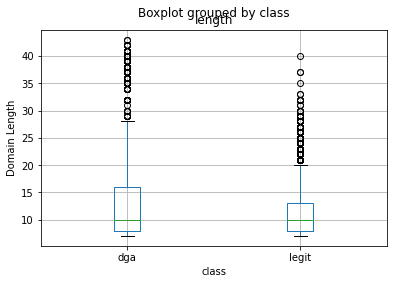

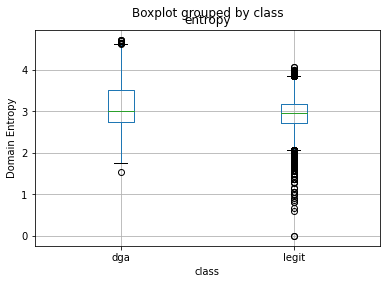

In [23]:
# Boxplots
# 
from matplotlib import pylab

# Plot the length and entropy of domains
all_domains.boxplot('length','class')
pylab.ylabel('Domain Length')
all_domains.boxplot('entropy','class')
pylab.ylabel('Domain Entropy')


Text(0, 0.5, 'Domain Entropy')

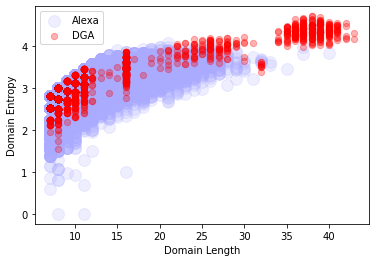

In [24]:
# 2 boyutlu grafik 
import matplotlib.pyplot as plt
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
alexa = all_domains[~cond]
plt.scatter(alexa['length'], alexa['entropy'], s=140, c='#aaaaff', label='Alexa', alpha=.2)
plt.scatter(dga['length'], dga['entropy'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Domain Entropy')

# Below you can see that our DGA domains do tend to have higher entropy than Alexa on average.

In [25]:
# 4 ten büyük entropy e sahip domainlerin büyük çoğunluğu dga 358 e 3 
high_entropy_domains = all_domains[all_domains['entropy'] > 4]
print ('Num Domains above 4 entropy: %.2f%% %d (out of %d)' % (100.0*high_entropy_domains.shape[0]/all_domains.shape[0],high_entropy_domains.shape[0],all_domains.shape[0]))
print("Num high entropy legit: %d" % high_entropy_domains[high_entropy_domains['class']=='legit'].shape[0])
print("Num high entropy DGA: %d" % high_entropy_domains[high_entropy_domains['class']=='dga'].shape[0])
high_entropy_domains[high_entropy_domains['class']=='legit'].head()
# random forest algoritması ilk bu kısımdan dallanabilir


Num Domains above 4 entropy: 0.57% 360 (out of 63000)
Num high entropy legit: 2
Num high entropy DGA: 358


,domain,class,length,entropy,contains_digit,vowel_ratio
41726,theukwebdesigncompany,legit,21,4.070656,0,0.333333
45259,congresomundialjjrperu2009,legit,26,4.056021,1,0.363636


In [26]:
high_entropy_domains[high_entropy_domains['class']=='dga'].head()

,domain,class,length,entropy,contains_digit,vowel_ratio
82250,a17btkyb38gxe41pwd50nxmzjxiwjwdwfrp52,dga,37,4.540402,1,0.111111
82251,a17c49l68ntkqnuhvkrmyb28fubvn30e31g43dq,dga,39,4.631305,1,0.160000
82252,a17d60gtnxk47gskti15izhvlviyksh64nqkz,dga,37,4.270132,1,0.148148
82253,a17erpzfzh64c69csi35bqgvp52drita67jzmy,dga,38,4.629249,1,0.192308
82254,a17fro51oyk67b18ksfzoti55j36p32o11fvc29cr,dga,41,4.305859,1,0.260870


In [27]:
# Attributelar X
# class labellar y

# List of feature vectors (scikit learn uses 'X' for the matrix of feature vectors)
#X = all_domains.as_matrix(['length', 'entropy']) stili artık çalışmıyor values kullanacağız 

X = all_domains[['length','entropy','contains_digit','vowel_ratio']].values
# Labels (scikit learn uses 'y' for classification labels)
y = np.array(all_domains['class'].tolist()) # list şeklinde aldık  
                                            

In [28]:
# Random forest
# http://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html

import sklearn.ensemble
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=20) # esimator tree sayısı
#Modeli

In [29]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf, X, y, cv=5,n_jobs=1)
print(scores)

[0.97769841 0.97833333 0.97888889 0.9781746  0.97809524]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#eğittik

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9794444444444445

Confusion Matrix Stats
legit/legit: 99.56% (12095/12149)
legit/dga: 0.44% (54/12149)
dga/legit: 45.45% (205/451)
dga/dga: 54.55% (246/451)


C:\Users\rizay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['legit', 'dga'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


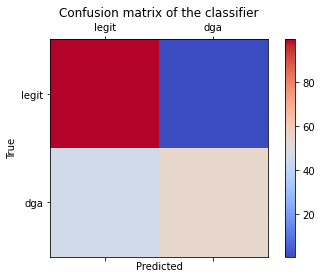

In [32]:
# 80/20 confusion matrix gorsellendirmesi
from sklearn.metrics import confusion_matrix
labels = ['legit', 'dga']
cm = confusion_matrix(y_test, y_pred, labels)

def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # FP TP gibi tahminlerin oranı
    
    print('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    pylab.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    pylab.xlabel('Predicted')
    pylab.ylabel('True')
    pylab.show()

plot_cm(cm, labels)


In [33]:
# Bütün alexa domainleri için ngram hesaplıyoruz. Bu dga ve legit tahminlerimizin başarı oranını arttıracak.


# Scikitlearnde ki hazır char ngram mmodelini kullanıyoruz (we're using char).
# Parameters: 
#       - ngram_range=(3,5)  
#       - min_df=1e-4        
#                            
alexa_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)# eşik değerleri arasındaki ngram kombinasyonları belirlendi.

In [34]:
# fit transform yaparak verileri normalize hale getirdik
counts_matrix = alexa_vc.fit_transform(alexa_dataframe['domain'])#alexavc içerisinde alexadataset içindeki ngram kombinasyonları var idi. fitleyerek alexa domainler içerisindeki bulunma sıklıklarını tutuyoruz. 
alexa_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = alexa_vc.get_feature_names()#asd 

In [35]:
# Büyükten küçüğe sıraladık ngram değerlerini
import operator
_sorted_ngrams = sorted(zip(ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)
print('Alexa NGrams: %d' % len(_sorted_ngrams))
for ngram, count in _sorted_ngrams[:10]:
    print(ngram, count)

Alexa NGrams: 23831
ing 3.3944516808262164
lin 3.3787611753163733
ine 3.355834495884936
ter 3.2247919564926817
tor 3.216957207361097
ion 3.203304916138483
ent 3.182984967003582
the 3.1607685618611283
por 3.158060793936605
tra 3.117602691690084


In [36]:
# Dictionary okundu
word_dataframe = pd.read_csv(r'C:\Users\rizay\tez\words.txt', names=['word'], header=None, dtype={'word': np.str}, encoding='utf-8')

# Data ccleaning
word_dataframe = word_dataframe[word_dataframe['word'].map(lambda x: str(x).isalpha())]# ALFABEYE uygun wordleri seçtik.
word_dataframe = word_dataframe.applymap(lambda x: str(x).strip().lower())
word_dataframe = word_dataframe.dropna()
word_dataframe = word_dataframe.drop_duplicates()
word_dataframe.head(10)

,word
37,a
48,aa
51,aaa
53,aaaa
54,aaaaaa
55,aaal
56,aaas
57,aaberg
58,aachen
59,aae


In [37]:
#Tıpkı alexa domainlerde oldugu gibi words.txt dosyasındakilere ngram uygulayacağız.
#ngram modeli oluşturup fitleyerek worddataframe e uyguladık
dict_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
counts_matrix = dict_vc.fit_transform(word_dataframe['word'])# ngram kombinasyonlarının miktarını matrixte tutması
dict_counts = np.log10(counts_matrix.sum(axis=0).getA1())# yoğunluk(gain?)
ngrams_list = dict_vc.get_feature_names()

In [38]:
import operator
_sorted_ngrams = sorted(zip(ngrams_list, dict_counts), key=operator.itemgetter(1), reverse=True)# zip pair
print('Word NGrams: %d' % len(_sorted_ngrams))
for ngram, count in _sorted_ngrams[:10]:
    print(ngram, count)

Word NGrams: 123061
ing 4.387300822448285
ess 4.204879333760662
ati 4.1933472563864616
ion 4.165036479994566
ter 4.162415036106447
nes 4.112504458767161
tio 4.076822423342773
ate 4.0723602039634885
ent 4.069631102620343
tion 4.0496056125949735


In [39]:
# count matrix degerlerin toplamı
def ngram_count(domain):
    alexa_match = alexa_counts * alexa_vc.transform([domain]).T  # Transpoze alındı.Ngram Kombinasyonlarda domaine uyanların sayısı
    dict_match = dict_counts * dict_vc.transform([domain]).T
    print('%s Alexa match:%d Dict match: %d' % (domain, alexa_match, dict_match))

# Examples:
ngram_count('google')
ngram_count('facebook')
ngram_count('1cb8a5f36f')
ngram_count('pterodactylfarts')
ngram_count('ptes9dro-dwacty2lfa5rrts')
ngram_count('beyonce')
ngram_count('bey666on4ce')

google Alexa match:16 Dict match: 14
facebook Alexa match:30 Dict match: 27
1cb8a5f36f Alexa match:0 Dict match: 0
pterodactylfarts Alexa match:34 Dict match: 76
ptes9dro-dwacty2lfa5rrts Alexa match:19 Dict match: 28
beyonce Alexa match:15 Dict match: 16
bey666on4ce Alexa match:2 Dict match: 1


In [40]:
print(alexa_vc.transform(['google']).T)

  (8228, 0)	1
  (8303, 0)	1
  (8307, 0)	1
  (8308, 0)	1
  (15158, 0)	1
  (15159, 0)	1
  (15731, 0)	1
  (15732, 0)	1
  (15733, 0)	1


In [41]:
alexa_counts

array([1.        , 1.        , 1.14612804, ..., 1.04139269, 1.11394335,
       0.95424251])

In [42]:
# bütün dataset e yukardaki işlemler uygulandı
all_domains['alexa_grams']= alexa_counts * alexa_vc.transform(all_domains['domain']).T 
all_domains['word_grams']= dict_counts * dict_vc.transform(all_domains['domain']).T 
all_domains.head()

,domain,class,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams
0,jivesoftware,legit,12,3.418296,0,0.416667,45.156177,40.548443
1,allmyfavorites,legit,14,3.521641,0,0.357143,36.727966,53.341905
4,freepdfdb,legit,9,2.503258,0,0.222222,17.658619,14.911453
5,mazanne,legit,7,2.235926,0,0.428571,15.348539,20.567048
7,toukoucity,legit,10,2.721928,0,0.500000,17.194506,26.086390


In [43]:
all_domains.tail()

,domain,class,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams
84624,ulxxqduryvv,dga,11,2.913977,0,0.181818,3.753430,6.464859
84625,ummvzhin,dga,8,2.750000,0,0.250000,6.170218,7.180022
84626,umsgnwgc,dga,8,2.750000,0,0.125000,3.258158,3.847079
84627,umzsbhpkrgo,dga,11,3.459432,0,0.181818,1.653213,2.546543
84628,umzuyjrfwyf,dga,11,2.913977,0,0.181818,0.000000,0.000000


In [44]:
#Farklarından ayrı bir feature olusturduk
all_domains['diff'] = all_domains['alexa_grams'] - all_domains['word_grams']
all_domains.sort_values(['diff'], ascending=True).head(10)


,domain,class,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams,diff
16349,bipolardisorderdepressionanxiety,legit,32,3.616729,0,0.406250,113.460959,190.833856,-77.372897
31554,stirringtroubleinternationally,legit,30,3.481728,0,0.366667,131.623607,207.204729,-75.581123
31504,americansforresponsiblesolutions,legit,32,3.667838,0,0.406250,143.839667,218.363956,-74.524289
81700,channel4embarrassingillnesses,legit,29,3.440070,1,0.321429,95.674973,169.119440,-73.444467
41580,egaliteetreconciliation,legit,23,3.186393,0,0.521739,90.336185,152.125325,-61.789140
50645,interoperabilitybridges,legit,23,3.588354,0,0.391304,94.016497,153.626312,-59.609816
66112,carbohydratecolumns,legit,19,3.826875,0,0.315789,41.225904,100.669951,-59.444048
15724,foreclosurephilippines,legit,22,3.447402,0,0.409091,73.233639,132.514638,-59.280999
54188,corazonindomablecapitulos,legit,25,3.813661,0,0.440000,74.015105,133.160690,-59.145585
82487,canadianpharmaceuticalsorg,dga,26,3.690260,0,0.423077,84.352696,143.316082,-58.963386


In [45]:
all_domains.sort_values(['diff'], ascending=False).head(50)

#Diff e gore sıralandı

,domain,class,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams,diff
36653,stream-free-movies-online,legit,25,3.509275,0,0.454545,118.507340,74.496915,44.010424
57412,best-online-shopping-site,legit,25,3.452879,0,0.363636,121.701555,79.596640,42.104916
15419,watch-free-movie-online,legit,23,3.708132,0,0.450000,100.637445,58.943451,41.693994
76643,online-web-directory,legit,20,3.584184,0,0.388889,113.544599,74.082948,39.461651
54752,free-online-directory,legit,21,3.403989,0,0.421053,119.647569,80.735030,38.912539
81734,movie-news-online,legit,17,3.175123,0,0.466667,79.652811,41.705735,37.947075
69366,web-directory-online,legit,20,3.584184,0,0.388889,111.827852,74.082948,37.744903
14370,xxx-porno-sexvideos,legit,19,3.260828,0,0.352941,71.956695,34.574489,37.382206
73919,free-tv-video-online,legit,20,3.284184,0,0.470588,82.345517,45.662984,36.682533
29201,freegamesforyourwebsite,legit,23,3.551191,0,0.434783,113.643437,77.311761,36.331676


Text(0, 0.5, 'Alexa NGram Eşleşmesi')

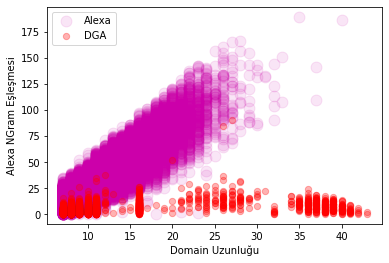

In [46]:
#plot
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
legit = all_domains[~cond]
plt.scatter(legit['length'], legit['alexa_grams'], s=120, c='#cc00aa', label='Alexa', alpha=.1)
plt.scatter(dga['length'], dga['alexa_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Uzunluğu')
pylab.ylabel('Alexa NGram Eşleşmesi')

Text(0, 0.5, 'Alexa Gram Eşleşmesi')

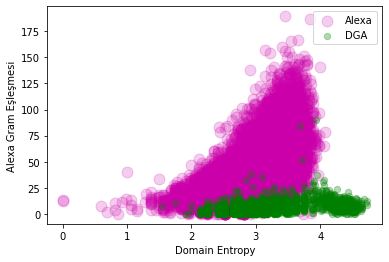

In [47]:
# bakalım ne olmuş
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
legit = all_domains[~cond]
plt.scatter(legit['entropy'], legit['alexa_grams'],  s=120, c='#cc00aa', label='Alexa', alpha=.2)
plt.scatter(dga['entropy'], dga['alexa_grams'], s=40, c='g', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Entropy')
pylab.ylabel('Alexa Gram Eşleşmesi')

Text(0, 0.5, 'WordList NGram Eşleşmesi')

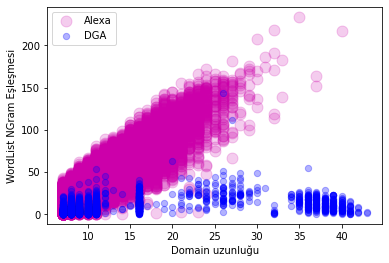

In [48]:

cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
legit = all_domains[~cond]
plt.scatter(legit['length'], legit['word_grams'],  s=120, c='#cc00aa', label='Alexa', alpha=.2)
plt.scatter(dga['length'], dga['word_grams'], s=40, c='b', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain uzunluğu')
pylab.ylabel('WordList NGram Eşleşmesi')

In [49]:
# Çok weird bir durum gerçekten
all_domains[(all_domains['word_grams']==0)].head()

,domain,class,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams,diff
247,dnp-cdms,legit,8,2.750000,0,0.000000,0.000000,0.0,0.000000
546,5311314,legit,7,1.842371,1,0.000000,1.113943,0.0,1.113943
1801,2120962,legit,7,2.128085,1,0.000000,1.079181,0.0,1.079181
2303,05tz2e9,legit,7,2.807355,1,0.333333,0.000000,0.0,0.000000
3186,smtp2go,legit,7,2.807355,1,0.166667,2.146128,0.0,2.146128


In [50]:
# Alexgrams ve ngrams ninimum değerlerinde 0 olanlar gariptir.
all_domains[all_domains['class']=='legit'].describe()

,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams,diff
count,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000
mean,10.866508,2.929685,0.059519,0.381787,32.706556,40.727934,-8.021379
std,3.373277,0.346231,0.236595,0.093422,19.059404,23.235249,9.443138
min,7.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-77.372897
25%,8.000000,2.725481,0.000000,0.333333,18.829119,23.923721,-13.177396
50%,10.000000,2.947703,0.000000,0.375000,28.410850,36.140515,-7.280405
75%,13.000000,3.169925,0.000000,0.444444,42.007600,52.910890,-2.093439
max,40.000000,4.070656,1.000000,0.857143,189.361028,233.648571,44.010424


Text(0, 0.5, 'Maximum NGram Score')

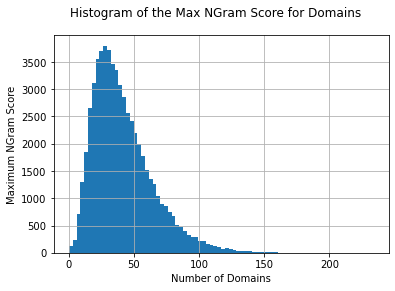

In [51]:
# Yuksek ve dusuk ngram degerlerine sahip domainlerin grafik halinde görünümü
legit = all_domains[(all_domains['class']=='legit')]
max_grams = np.maximum(legit['alexa_grams'],legit['word_grams'])
ax = max_grams.hist(bins=80)
ax.figure.suptitle('Histogram of the Max NGram Score for Domains')
pylab.xlabel('Number of Domains')
pylab.ylabel('Maximum NGram Score')

In [52]:
# Legit class ında word_grams ve alexa_grams değerleri için eşik belirledik (bu değerler üzerinde oynama yapılabiilir) ve bu eşik dışında kalan verileri weird label ina koyduk.
weird_cond = (all_domains['class']=='legit') & (all_domains['word_grams']<3) & (all_domains['alexa_grams']<2)
weird = all_domains[weird_cond]#dataframe
print(weird.shape[0])
weird.head(30)

87


,domain,class,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams,diff
247,dnp-cdms,legit,8,2.750000,0,0.000000,0.000000,0.000000,0.000000
546,5311314,legit,7,1.842371,1,0.000000,1.113943,0.000000,1.113943
767,d4ffr55,legit,7,2.235926,1,0.000000,1.041393,2.260071,-1.218679
1526,jzbybyw,legit,7,2.235926,0,0.000000,1.000000,1.924279,-0.924279
1801,2120962,legit,7,2.128085,1,0.000000,1.079181,0.000000,1.079181
2303,05tz2e9,legit,7,2.807355,1,0.333333,0.000000,0.000000,0.000000
3398,9to5lol,legit,7,2.235926,1,0.400000,1.986772,2.359835,-0.373064
4442,dp1kvt4,legit,7,2.807355,1,0.000000,0.000000,0.000000,0.000000
4653,ecfcpug,legit,7,2.521641,0,0.285714,0.000000,2.056905,-2.056905
4865,520e314,legit,7,2.807355,1,0.000000,1.079181,0.000000,1.079181


In [53]:
# WEİYYYYY 
#
# Sıkıntı şu: Bu değerlere legit diyemeyiz, 
#Bu değerleri legit olarak sınıflandırmak bizim algoritmamızın başarısını düşürmekte.
#             Legit classı artık weird ve legit class larına bölündü.
#             Bu domainlerin sayısı yaklaşık 80 dir.
all_domains.loc[weird_cond, 'class'] = 'weird'
print(all_domains['class'].value_counts())
all_domains[all_domains['class'] == 'weird'].head()

legit    60516
dga       2397
weird       87
Name: class, dtype: int64


,domain,class,length,entropy,contains_digit,vowel_ratio,alexa_grams,word_grams,diff
247,dnp-cdms,weird,8,2.750000,0,0.0,0.000000,0.000000,0.000000
546,5311314,weird,7,1.842371,1,0.0,1.113943,0.000000,1.113943
767,d4ffr55,weird,7,2.235926,1,0.0,1.041393,2.260071,-1.218679
1526,jzbybyw,weird,7,2.235926,0,0.0,1.000000,1.924279,-0.924279
1801,2120962,weird,7,2.128085,1,0.0,1.079181,0.000000,1.079181


In [54]:
# Düzenlenmiş dataset ile tekrar modeli eğitiyoruz
# Feature Selection aşaması
X = all_domains[['length', 'entropy', 'alexa_grams', 'word_grams','contains_digit','vowel_ratio']].values

# Classlar listelendi
y = np.array(all_domains['class'].tolist())

# Train on a 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [55]:
X_train

array([[17.        ,  3.10188122, 61.96743694, 92.5797149 ,  0.        ,
         0.41176471],
       [17.        ,  3.17512314, 73.03993551, 65.75539417,  0.        ,
         0.47058824],
       [11.        ,  3.09579526, 56.67201539, 80.6090534 ,  0.        ,
         0.45454545],
       ...,
       [14.        ,  3.03914867, 40.88588821, 68.28748451,  0.        ,
         0.42857143],
       [14.        ,  2.84237099, 45.00956988, 51.69102547,  0.        ,
         0.46153846],
       [14.        ,  2.98522814, 68.81062583, 72.19399378,  0.        ,
         0.35714286]])

Confusion Matrix Stats
legit/legit: 99.71% (12074/12109)
legit/weird: 0.00% (0/12109)
legit/dga: 0.29% (35/12109)
weird/legit: 7.14% (1/14)
weird/weird: 64.29% (9/14)
weird/dga: 28.57% (4/14)
dga/legit: 11.95% (57/477)
dga/weird: 0.42% (2/477)
dga/dga: 87.63% (418/477)


C:\Users\rizay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['legit', 'weird', 'dga'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


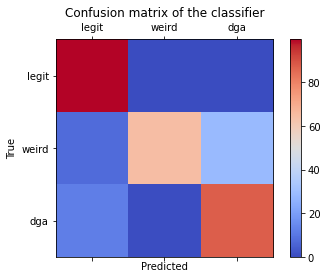

In [56]:
# ---
labels = ['legit', 'weird', 'dga']
cm = confusion_matrix(y_test, y_pred, labels)
plot_cm(cm, labels)

In [57]:

not_weird = all_domains[all_domains['class'] != 'weird']
X = not_weird[['length', 'entropy', 'alexa_grams', 'word_grams','contains_digit','vowel_ratio']].values

# list halinde almalıyız class ları
y = np.array(not_weird['class'].tolist())

# 80 e 20
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Confusion Matrix Stats
legit/legit: 99.77% (12060/12088)
legit/dga: 0.23% (28/12088)
dga/legit: 14.34% (71/495)
dga/dga: 85.66% (424/495)


C:\Users\rizay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['legit', 'dga'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


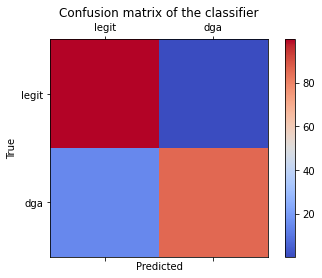

In [58]:
labels = ['legit', 'dga']
cm = confusion_matrix(y_test, y_pred, labels)
plot_cm(cm, labels) 

In [59]:
# Well it's definitely better.. but haven't we just cheated by removing
# the weird domains?  Well perhaps, but on some level we're removing
# outliers that are bad exemplars. So to validate that the model is still
# doing the right thing lets try our new model prediction on our hold out sets.

# First train on the whole thing before looking at prediction performance
clf.fit(X, y)

# Pull together our hold out set
hold_out_domains = pd.concat([hold_out_alexa, hold_out_dga], ignore_index=True)

# Add a length field for the domain
hold_out_domains['length'] = [len(x) for x in hold_out_domains['domain']]
hold_out_domains = hold_out_domains[hold_out_domains['length'] > 6]

# Add a entropy field for the domain
hold_out_domains['entropy'] = [entropy(x) for x in hold_out_domains['domain']]

# Compute NGram matches for all the domains and add to our dataframe
hold_out_domains['alexa_grams']= alexa_counts * alexa_vc.transform(hold_out_domains['domain']).T
hold_out_domains['word_grams']= dict_counts * dict_vc.transform(hold_out_domains['domain']).T
hold_out_domains['contains_digit'] = [contains_digit(x) for x in hold_out_domains['domain']]
hold_out_domains['vowel_ratio'] = [vowel_ratio(x) for x in hold_out_domains['domain']]
hold_out_domains.head()

,domain,class,length,entropy,alexa_grams,word_grams,contains_digit,vowel_ratio
1,newmoney,legit,8,2.500000,20.530056,23.341221,0,0.375000
2,mlxchange,legit,9,3.169925,27.414058,30.554208,0,0.222222
3,mclassmovies,legit,12,3.022055,45.225969,44.494775,0,0.333333
5,nemadgang,legit,9,2.503258,20.545376,25.001677,0,0.333333
6,xiashanet,legit,9,2.947703,24.972878,32.964340,0,0.444444


Confusion Matrix Stats
legit/legit: 99.46% (6669/6705)
legit/dga: 0.54% (36/6705)
dga/legit: 12.73% (34/267)
dga/dga: 87.27% (233/267)


C:\Users\rizay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['legit', 'dga'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\rizay\AppData\Local\Temp/ipykernel_3868/4036604285.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


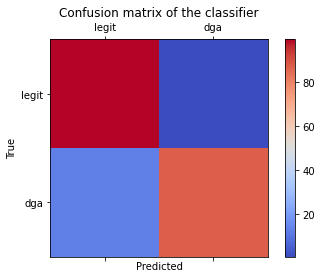

In [60]:
# hold out lar için feature extracting (x ler-> feature vector)
hold_X = hold_out_domains[['length', 'entropy', 'alexa_grams', 'word_grams','contains_digit','vowel_ratio']].values

# Labels (list şeklinde)
hold_y = np.array(hold_out_domains['class'].tolist())

# Now run through the predictive model
hold_y_pred = clf.predict(hold_X)

# Add the prediction array to the dataframe
hold_out_domains['pred'] = hold_y_pred

# Now plot the results
labels = ['legit', 'dga']
cm = confusion_matrix(hold_y, hold_y_pred, labels)
plot_cm(cm, labels) 

Text(0, 0.5, 'Alexa NGram Matches')

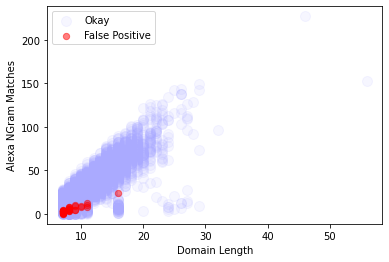

In [61]:
# Okay so on our 10% hold out set of 10k domains about ~100 domains were mis-classified
# at this point we're made some good progress so we're going to claim success :)
#       - Out of 10k domains 100 were mismarked
#       - false positives (Alexa marked as DGA) = ~0.6%
#       - about 80% of the DGA are getting marked


# Now were going to just do some post analysis on how the ML algorithm performed.

# Lets look at a couple of plots to see which domains were misclassified.
# Looking at Length vs. Alexa NGrams
fp_cond = ((hold_out_domains['class'] == 'legit') & (hold_out_domains['pred']=='dga'))
fp = hold_out_domains[fp_cond]
fn_cond = ((hold_out_domains['class'] == 'dba') & (hold_out_domains['pred']=='legit'))
fn = hold_out_domains[fn_cond]
okay = hold_out_domains[hold_out_domains['class'] == hold_out_domains['pred']]
plt.scatter(okay['length'], okay['alexa_grams'], s=100,  c='#aaaaff', label='Okay', alpha=.1)
plt.scatter(fp['length'], fp['alexa_grams'], s=40, c='r', label='False Positive', alpha=.5)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Alexa NGram Matches')

Text(0, 0.5, 'Dictionary NGram Matches')

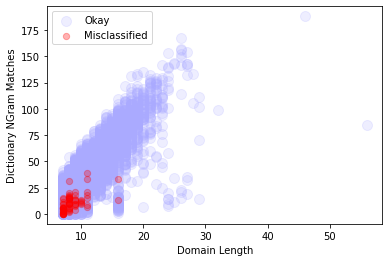

In [62]:
# Looking at Length vs. Dictionary NGrams
cond = (hold_out_domains['class'] != hold_out_domains['pred'])
misclassified = hold_out_domains[cond]
okay = hold_out_domains[~cond]
plt.scatter(okay['length'], okay['word_grams'], s=100,  c='#aaaaff', label='Okay', alpha=.2)
plt.scatter(misclassified['length'], misclassified['word_grams'], s=40, c='r', label='Misclassified', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Dictionary NGram Matches')

In [63]:
misclassified.head()

,domain,class,length,entropy,alexa_grams,word_grams,contains_digit,vowel_ratio,pred
139,anrdoezrs,legit,9,2.947703,4.760151,8.382118,0,0.333333,dga
158,pfc-cska,legit,8,2.750000,3.369216,2.290035,0,0.142857,dga
489,tursvodka,legit,9,3.169925,9.683643,13.859938,0,0.333333,dga
501,3181302,legit,7,2.235926,0.000000,0.000000,1,0.000000,dga
622,mpekuzihuru,legit,11,3.027169,10.349145,14.817997,0,0.454545,dga


In [64]:
misclassified[misclassified['class'] == 'dga'].head()

,domain,class,length,entropy,alexa_grams,word_grams,contains_digit,vowel_ratio,pred
9139,uolsugtlg,dga,9,2.503258,6.679631,9.346657,0,0.333333,legit
9149,usbiezgac,dga,9,3.169925,7.857247,9.172547,0,0.444444,legit
9150,ushcnewo,dga,8,3.000000,12.361074,13.904812,0,0.375000,legit
9155,utamehz,dga,7,2.807355,9.843039,14.733893,0,0.428571,legit
9157,utfowept,dga,8,2.750000,7.055047,16.814295,0,0.375000,legit


In [65]:
# We can also look at what features the learning algorithm thought were the most important
importances = zip(['length', 'entropy', 'alexa_grams', 'word_grams','contains_digit','vowel_ratio'], clf.feature_importances_)
print(importances)

# From the list below we see our feature importance scores. There's a lot of feature selection,
# sensitivity study, etc stuff that you could do if you wanted at this point.

In [66]:

#Manual test func




def test_it(domain):
    
    _alexa_match = alexa_counts * alexa_vc.transform([domain]).T 
    _dict_match = dict_counts * dict_vc.transform([domain]).T
    _X = [[len(domain), entropy(domain), _alexa_match, _dict_match, contains_digit(domain), vowel_ratio(domain)]]
    print('%s domain predicted as a : %s domain' % (domain, clf.predict(_X)[0]))

In [67]:

test_it('google')
test_it('google88asdasfxvcv')
test_it('facebook')
test_it('1cb8a5f36f')
test_it('pterodactylfarts')
test_it('ptes9dro-dwacty2lfa5rrts')
test_it('beyonce')
test_it('bey666on4ce')
test_it('superheroesinhere')
test_it('ttsedfsdlgvlxfcbvwittterr')
test_it('35-sdf-09jq43r')
test_it('clicksecurity')

google domain predicted as a : legit domain
google88asdasfxvcv domain predicted as a : legit domain
facebook domain predicted as a : legit domain
1cb8a5f36f domain predicted as a : dga domain
pterodactylfarts domain predicted as a : legit domain
ptes9dro-dwacty2lfa5rrts domain predicted as a : dga domain
beyonce domain predicted as a : legit domain
bey666on4ce domain predicted as a : dga domain
superheroesinhere domain predicted as a : legit domain
ttsedfsdlgvlxfcbvwittterr domain predicted as a : dga domain
35-sdf-09jq43r domain predicted as a : dga domain
clicksecurity domain predicted as a : legit domain


In [68]:
import os
import pickle
def save_model_to_disk(name, model, model_dir='models'):
    ''' Serialize and save a model to disk'''

    # model serialize edildi
    serialized_model = pickle.dumps(model, protocol=pickle.HIGHEST_PROTOCOL)
    #os.mkdir("C:/Users/rizay/tez",model_dir)
    # model uzantısını belirliyoruz
    model_path = os.path.join(model_dir, name+'.model')

    # Dosya içerisine model yazılıyor
    print('Storing Serialized Model to Disk (%s:%.2fMeg)' % (name, len(serialized_model)/1024.0/1024.0))
    open(model_path,'wb').write(serialized_model)

In [69]:
def load_model_from_disk(name, model_dir='models'):

    # Model directory is relative to this file
    model_path = os.path.join(model_dir, name+'.model')

    # Put a try/except around the model load in case it fails
    try:
        model = pickle.loads(open(model_path,'rb').read())
    except:
        print('Could not load model: %s from directory %s!' % (name, model_path))
        return None

    return model

In [70]:
save_model_to_disk('dga_model_random_forest', clf)
save_model_to_disk('dga_model_alexa_vectorizor', alexa_vc)
save_model_to_disk('dga_model_alexa_counts', alexa_counts)
save_model_to_disk('dga_model_dict_vectorizor', dict_vc)
save_model_to_disk('dga_model_dict_counts', dict_counts)


Storing Serialized Model to Disk (dga_model_random_forest:1.67Meg)
Storing Serialized Model to Disk (dga_model_alexa_vectorizor:2.28Meg)
Storing Serialized Model to Disk (dga_model_alexa_counts:0.18Meg)
Storing Serialized Model to Disk (dga_model_dict_vectorizor:2.92Meg)
Storing Serialized Model to Disk (dga_model_dict_counts:0.94Meg)


In [71]:
clf = load_model_from_disk('dga_model_random_forest')
alexa_vc = load_model_from_disk('dga_model_alexa_vectorizor')
alexa_counts = load_model_from_disk('dga_model_alexa_counts')
dict_vc = load_model_from_disk('dga_model_dict_vectorizor')
dict_counts = load_model_from_disk('dga_model_dict_counts')
model = {'clf':clf, 'alexa_vc':alexa_vc, 'alexa_counts':alexa_counts,
                 'dict_vc':dict_vc, 'dict_counts':dict_counts}